# Classifying Software Pirates in the Music Production Software Industry

This project sets out to explore the factors driving people into software piracy by training two machine learning models to predict whether a person with certain characteristics and sentiments is likely to possess any pirated software or not using a dataset collected via a survey targeting users of music production software.

Import necessary libraries and set preview options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_text, plot_tree, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Load data, handle missing data and ensure that numeric columns are actually numeric

In [2]:
df = pd.read_csv('Pricing of Music Production Software Survey Results Formatted Countries.csv')

for i in range(7, 9):
    df.iloc[:, i] = pd.to_numeric(df.iloc[:, i], errors = 'coerce')
    df.iloc[:, i] = df.iloc[:, i].fillna(0)
    df.iloc[:, i] = pd.to_numeric(df.iloc[:, i])
    
for i in range(11, 23):
    df.iloc[:, i] = pd.to_numeric(df.iloc[:, i], errors = 'coerce')
    df.iloc[:, i] = df.iloc[:, i].fillna(0)
    df.iloc[:, i] = pd.to_numeric(df.iloc[:, i])
    
df['Country'] = df['Country'].fillna('')
df['Software Discovery Methods'] = df['Software Discovery Methods'].fillna('')
df['Top 3 Purchase Decision Factors'] = df['Top 3 Purchase Decision Factors'].fillna('')
df['Factors Encouraging Purchases'] = df['Factors Encouraging Purchases'].fillna('')
    
df.head(3)

,Date,Time Spent,Expertise Level,Goals,Age Group,Country,Software Discovery Methods,Number of Non-Free Plugins Owned (Low),Number of Non-Free Plugins Owned (High),Top 3 Purchase Decision Factors,Can Afford All Desired Software,Max DAW Price (€),Max Single Effect Plugin Price (€),Max Multi-Effect Plugin Price (€),Max Virtual Instrument Price (€),Max Sound Library Price (€),Min Price Decrease for Purchase (%),Income Increase Required for Purchase at Full Price (%),Percentage of Pirated Software,Sentiment on Importance of Price,Sentiment on Higher Price = Higher Quality,Sentiment on Better Plugins = Better Music,Peer Influence on Purchases,Factors Encouraging Purchases,Frequency of Sales Resulting in Unintended Purchases,Favorite Software Companies,Additional Comments and Feedback
0,7/12/2021 15:28,0:11:27,Hobbyist,other: Career.,18 - 25,Finland,,0.0,0.0,"Price, Appearance, Ease of pirating","No, I often must turn to piracy",360.0,20.0,30.0,30.0,20.0,40.0,500.0,90.0,100.0,60.0,90.0,100.0,"Decrease in price, Increase in popularity, Making installing and managing them easier, Better support, Automatic updates",Never,"Serum, Waves, SoundToys.",Imanbek - Roses
1,7/14/2021 10:56,0:23:23,Hobbyist,"To just have fun, To start/maintain a career, To express oneself",18 - 25,Finland,"Recommendations by friends and colleagues, Tutorials",70.0,140.0,"Price, Specific features (functionality), Ease of pirating","No, I often must turn to piracy",300.0,45.0,120.0,200.0,50.0,80.0,300.0,85.0,90.0,75.0,90.0,90.0,"Decrease in price, Increase in popularity, Making installing and managing them easier, Seeing what software my friends own, Increase in income, New features, Personalized recommendations, Automatic updates",Rarely,"Image-Line, Xfer Studios, Lennardigital, FabFilter, SoundToys",-
2,7/14/2021 11:32,0:07:54,Independent Professional,To make a living,26 - 35,Finland,Online searches,411.0,500.0,"Workflow, Appearance, Specific features (functionality)","No, waiting for a sale",636.0,201.0,231.0,602.0,310.0,20.0,70.0,0.0,100.0,59.0,80.0,51.0,"Decrease in price, Sales/marketing campaigns, Rent-to-own",Sometimes,"Serum, I guess...",Great survey. This is good way to learn what music producers want and to make prices right.


Describe dataset

In [3]:
df.describe()

,Date,Time Spent,Expertise Level,Goals,Age Group,Country,Software Discovery Methods,Number of Non-Free Plugins Owned (Low),Number of Non-Free Plugins Owned (High),Top 3 Purchase Decision Factors,Can Afford All Desired Software,Max DAW Price (€),Max Single Effect Plugin Price (€),Max Multi-Effect Plugin Price (€),Max Virtual Instrument Price (€),Max Sound Library Price (€),Min Price Decrease for Purchase (%),Income Increase Required for Purchase at Full Price (%),Percentage of Pirated Software,Sentiment on Importance of Price,Sentiment on Higher Price = Higher Quality,Sentiment on Better Plugins = Better Music,Peer Influence on Purchases,Factors Encouraging Purchases,Frequency of Sales Resulting in Unintended Purchases,Favorite Software Companies,Additional Comments and Feedback
count,553,553,553,553,553,553,553,553.0,553.0,553,553,553.0,553.0,553.0,553.0,553.0,553.0,553.0,553.0,553.0,553.0,553.0,553.0,553,553,553,552
unique,526,400,6,52,8,72,181,89.0,139.0,139,5,131.0,98.0,120.0,123.0,117.0,47.0,84.0,44.0,69.0,74.0,79.0,78.0,275,5,466,247
top,7/15/2021 17:27,0:05:07,Hobbyist,"To just have fun, To express oneself",18 - 25,United States of America,"Recommendations by artists and experts, Online searches, Tutorials",0.0,20.0,"Price, Workflow, Specific features (functionality)","No, waiting for a sale",200.0,100.0,200.0,200.0,50.0,50.0,0.0,0.0,100.0,50.0,50.0,0.0,"Decrease in price, Increase in income",Sometimes,-,-
freq,3,5,272,110,173,145,39,141.0,37.0,91,144,61.0,84.0,63.0,77.0,68.0,128.0,139.0,277.0,117.0,91.0,76.0,102.0,27,188,73,303


Visualize easily visualizable columns with histograms

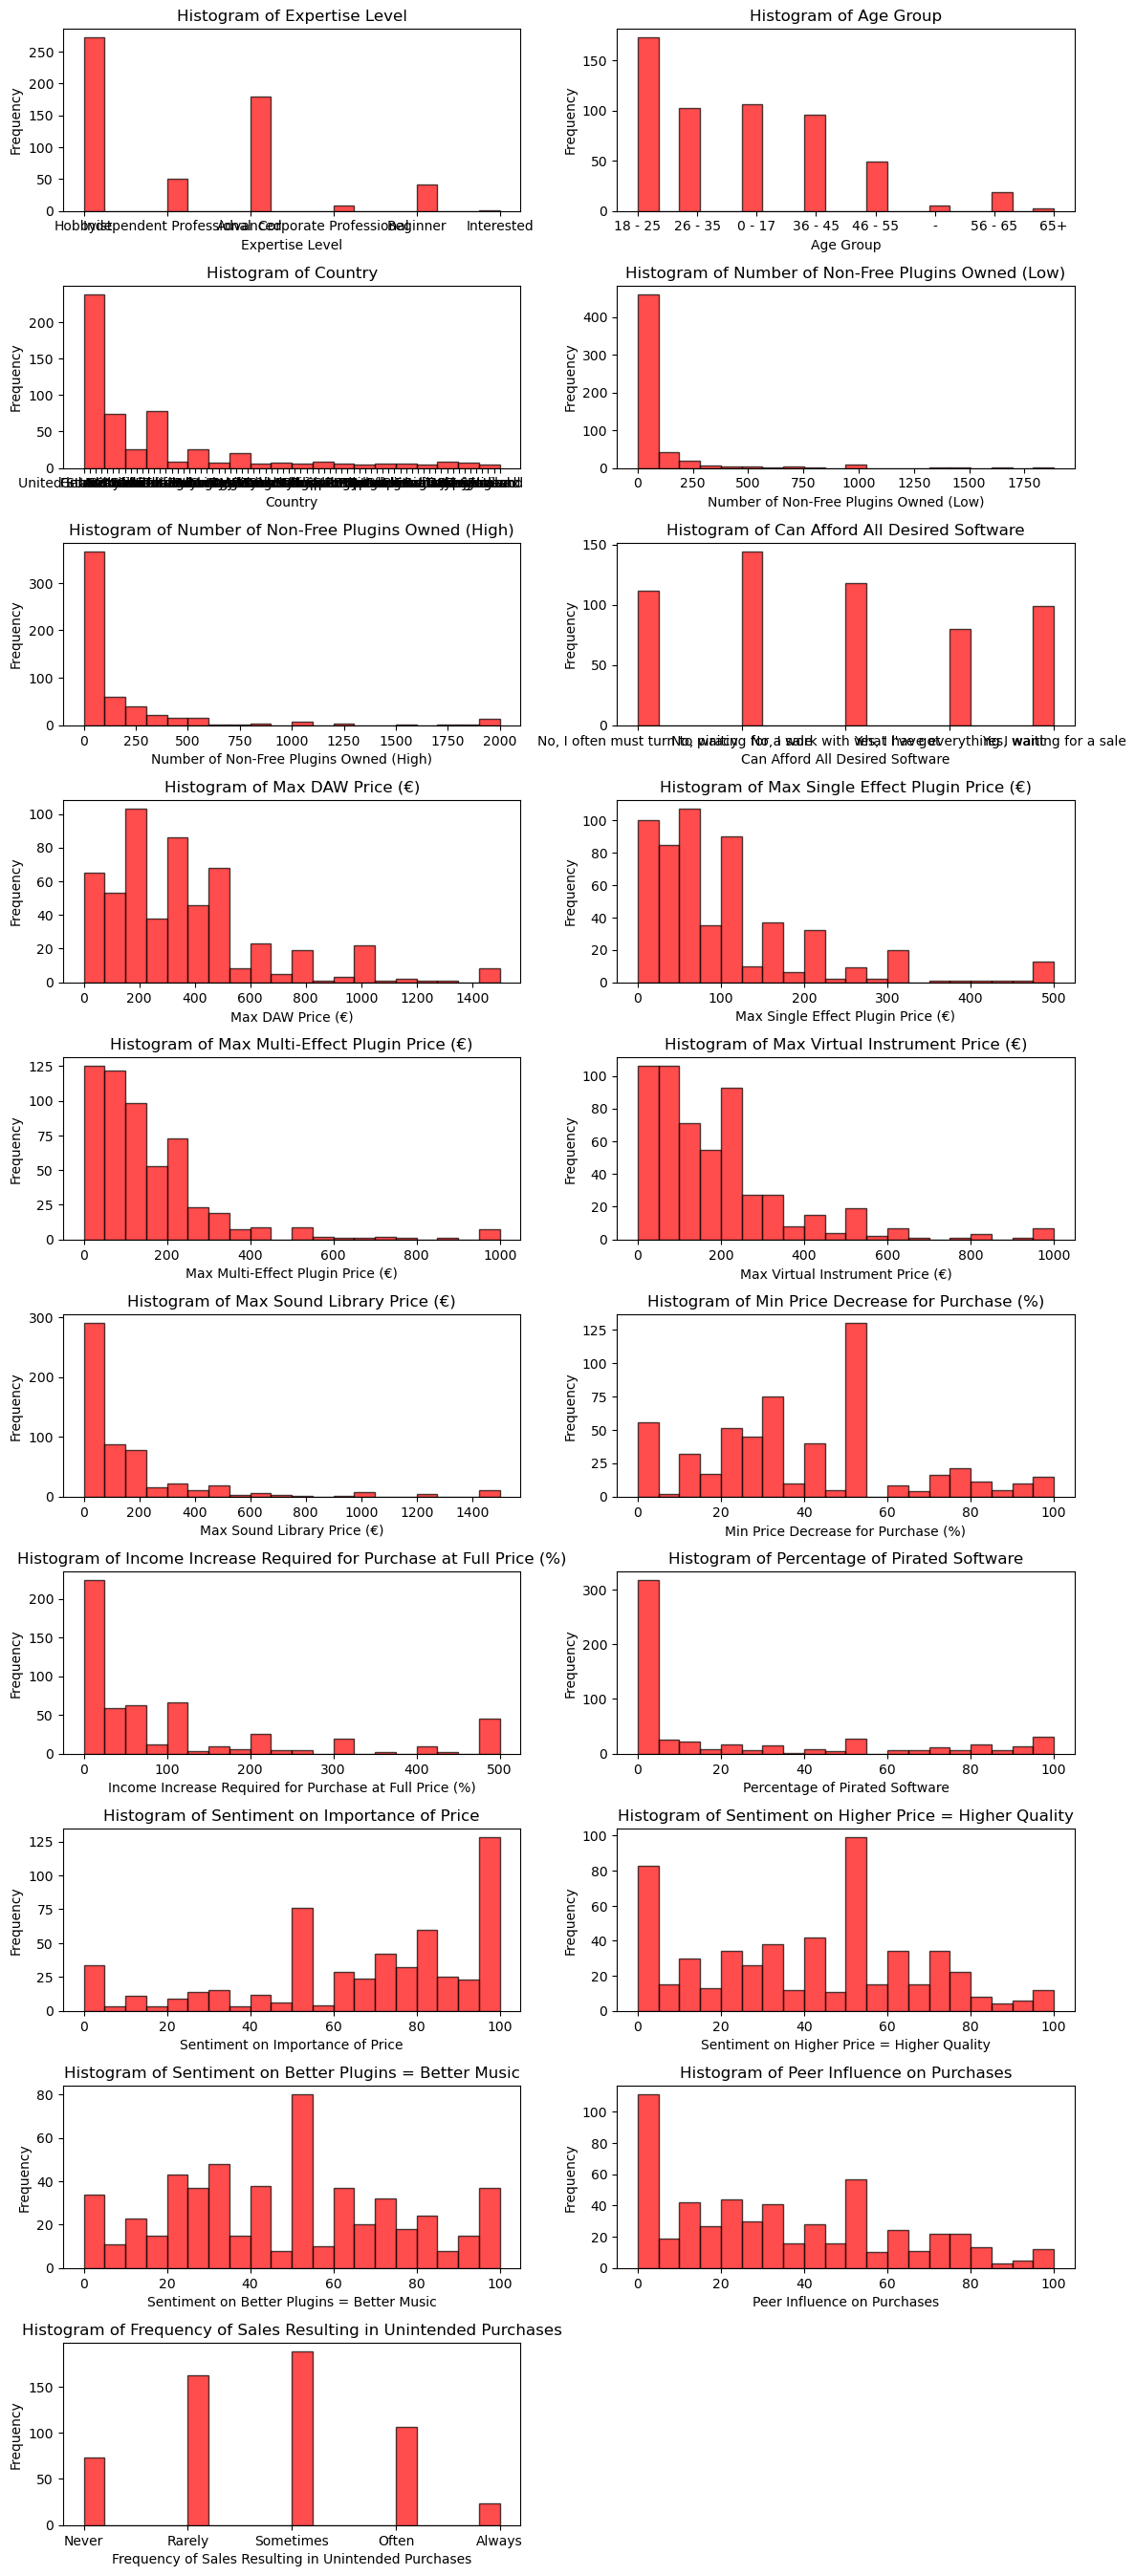

In [4]:
columns_to_plot = [
    'Expertise Level',
    'Age Group',
    'Country',
    'Number of Non-Free Plugins Owned (Low)',
    'Number of Non-Free Plugins Owned (High)',
    'Can Afford All Desired Software',
    'Max DAW Price (€)',
    'Max Single Effect Plugin Price (€)',
    'Max Multi-Effect Plugin Price (€)',
    'Max Virtual Instrument Price (€)',
    'Max Sound Library Price (€)',
    'Min Price Decrease for Purchase (%)',
    'Income Increase Required for Purchase at Full Price (%)',
    'Percentage of Pirated Software',
    'Sentiment on Importance of Price',
    'Sentiment on Higher Price = Higher Quality',
    'Sentiment on Better Plugins = Better Music',
    'Peer Influence on Purchases',
    'Frequency of Sales Resulting in Unintended Purchases'
]

plt.figure(figsize=(12, 32))

for i, column in enumerate(columns_to_plot, start = 1):
    plt.subplot(12, 2, i)
    plt.hist(df[column], bins = 20, color = 'red', edgecolor = 'black', alpha = 0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

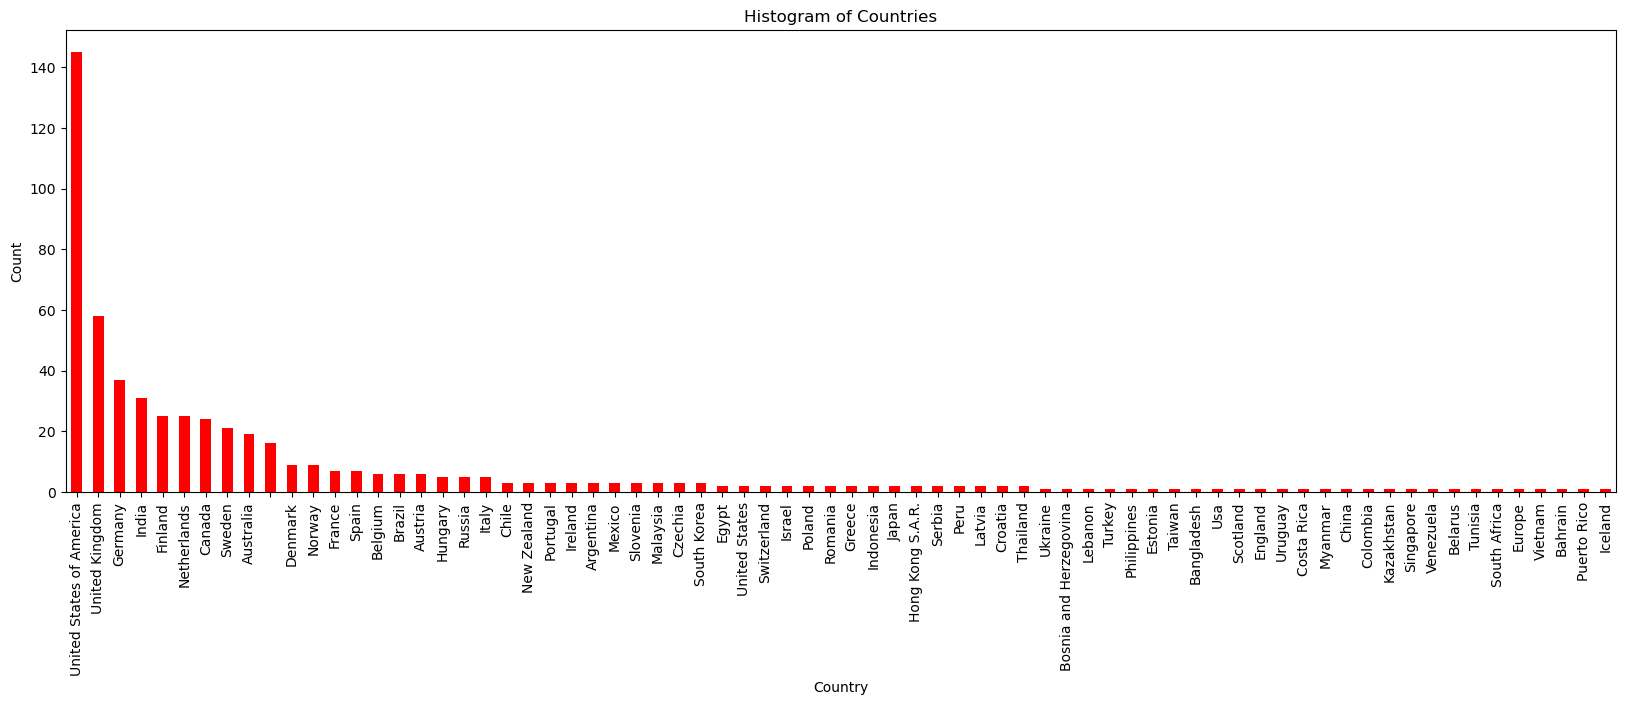

In [5]:
country_counts = df['Country'].value_counts()

plt.figure(figsize = (20, 6))
country_counts.plot(kind = 'bar', color = 'red')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Histogram of Countries')
plt.xticks(rotation = 90)
plt.show()

Engineer the Region feature based on countries to have larger sample sizes in each – now more even – category.

In [6]:
def get_geographical_area(country):
    country_to_area = {
        'Finland': 'Northern Europe',
        'Germany': 'Central Europe',
        'India': 'South Asia',
        'United States of America': 'North America',
        'Brazil': 'Latin America',
        'Australia': 'Oceania',
        'Canada': 'North America',
        'Netherlands': 'Western Europe',
        'Serbia': 'Eastern Europe',
        'Sweden': 'Northern Europe',
        'Czechia': 'Central Europe',
        'New Zealand': 'Oceania',
        'Ukraine': 'Eastern Europe',
        'United Kingdom': 'Western Europe',
        '': 'Unknown',
        'Thailand': 'Southeast Asia',
        'Latvia': 'Central Europe',
        'Italy': 'Southern Europe',
        'France': 'Western Europe',
        'Russia': 'Eastern Europe',
        'Norway': 'Northern Europe',
        'Hungary': 'Central Europe',
        'Portugal': 'Southern Europe',
        'Ireland': 'Western Europe',
        'Costa Rica': 'Latin America',
        'Mexico': 'Latin America',
        'Belgium': 'Western Europe',
        'Denmark': 'Northern Europe',
        'Malaysia': 'Southeast Asia',
        'Chile': 'Latin America',
        'Peru': 'Latin America',
        'Kazakhstan': 'Eastern Europe',
        'Venezuela': 'Latin America',
        'Croatia': 'Southern Europe',
        'South Africa': 'Africa',
        'South Korea': 'East Asia',
        'Hong Kong S.A.R.': 'East Asia',
        'Bahrain': 'Middle East',
        'Myanmar': 'Southeast Asia',
        'Israel': 'Middle East',
        'Philippines': 'Southeast Asia',
        'Spain': 'Southern Europe',
        'Puerto Rico': 'Latin America',
        'United States': 'North America',
        'Vietnam': 'Southeast Asia',
        'Europe': 'Unknown', 
        'Egypt': 'Africa',
        'Poland': 'Central Europe',
        'Tunisia': 'Africa',
        'Belarus': 'Eastern Europe',
        'Romania': 'Eastern Europe',
        'Singapore': 'Southeast Asia',
        'Greece': 'Southern Europe',
        'Colombia': 'Latin America',
        'China': 'East Asia',
        'Indonesia': 'Southeast Asia',
        'Argentina': 'Latin America',
        'Estonia': 'Central Europe',
        'Uruguay': 'Latin America',
        'Bosnia and Herzegovina': 'Southern Europe',
        'Lebanon': 'Middle East',
        'Switzerland': 'Central Europe',
        'Turkey': 'Middle East',
        'Austria': 'Central Europe',
        'Japan': 'East Asia',
        'Slovenia': 'Central Europe',
        'Taiwan': 'East Asia',
        'Bangladesh': 'South Asia',
        'Usa': 'North America',
        'Scotland': 'Western Europe',
        'England': 'Western Europe',
        'Iceland': 'Northern Europe',
    }

    geographical_area = country_to_area.get(country, 'Unknown')

    return geographical_area

df.insert(6, 'Region', df['Country'].apply(get_geographical_area))

Display a histogram of the Region feature. Unfortunately, there is not enough data for many detailed regions outside of Europe and America and thus, sometimes very general classes, such as Africa, have to be used for some regions.

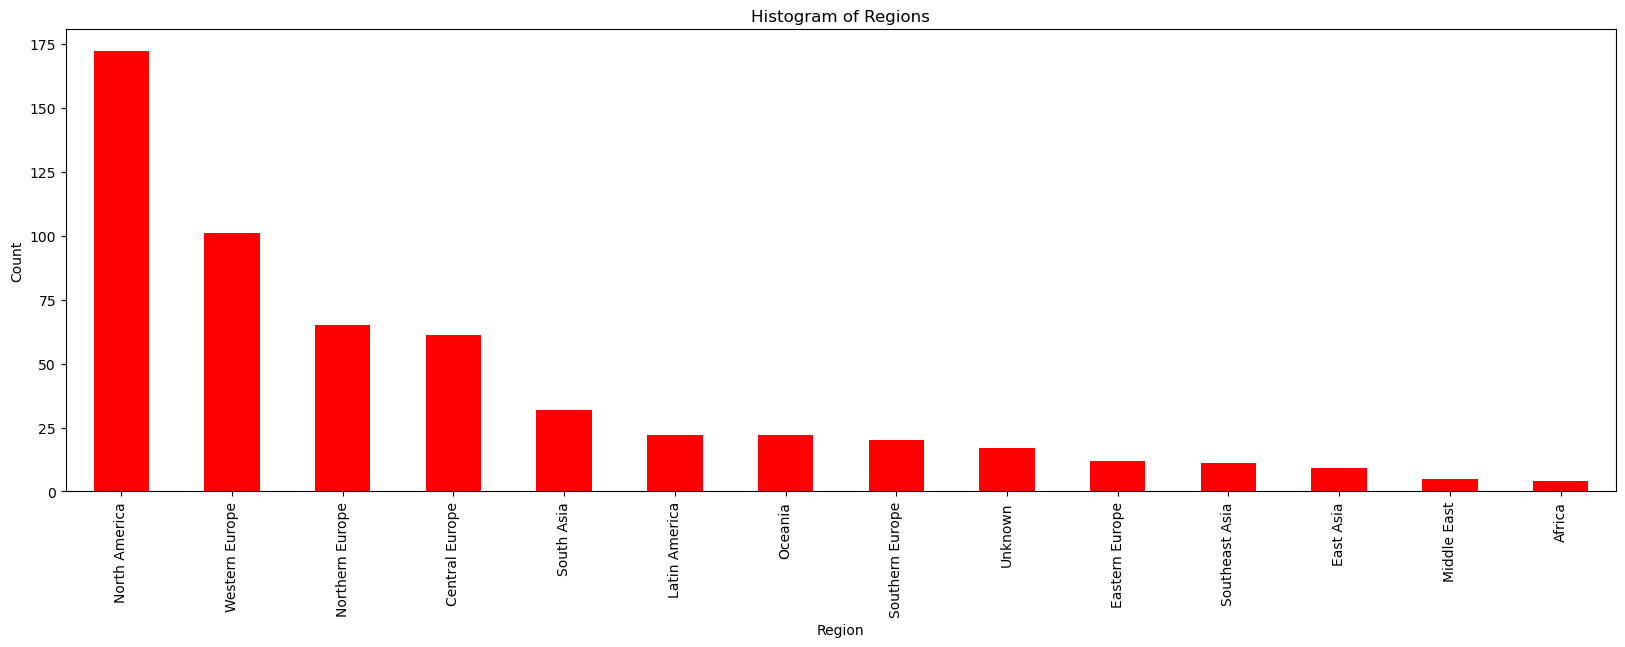

In [7]:
region_counts = df['Region'].value_counts()

plt.figure(figsize = (20, 6))
region_counts.plot(kind = 'bar', color = 'red')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Histogram of Regions')
plt.xticks(rotation = 90)
plt.show()

Explore potential features against Percentage of Pirated Software

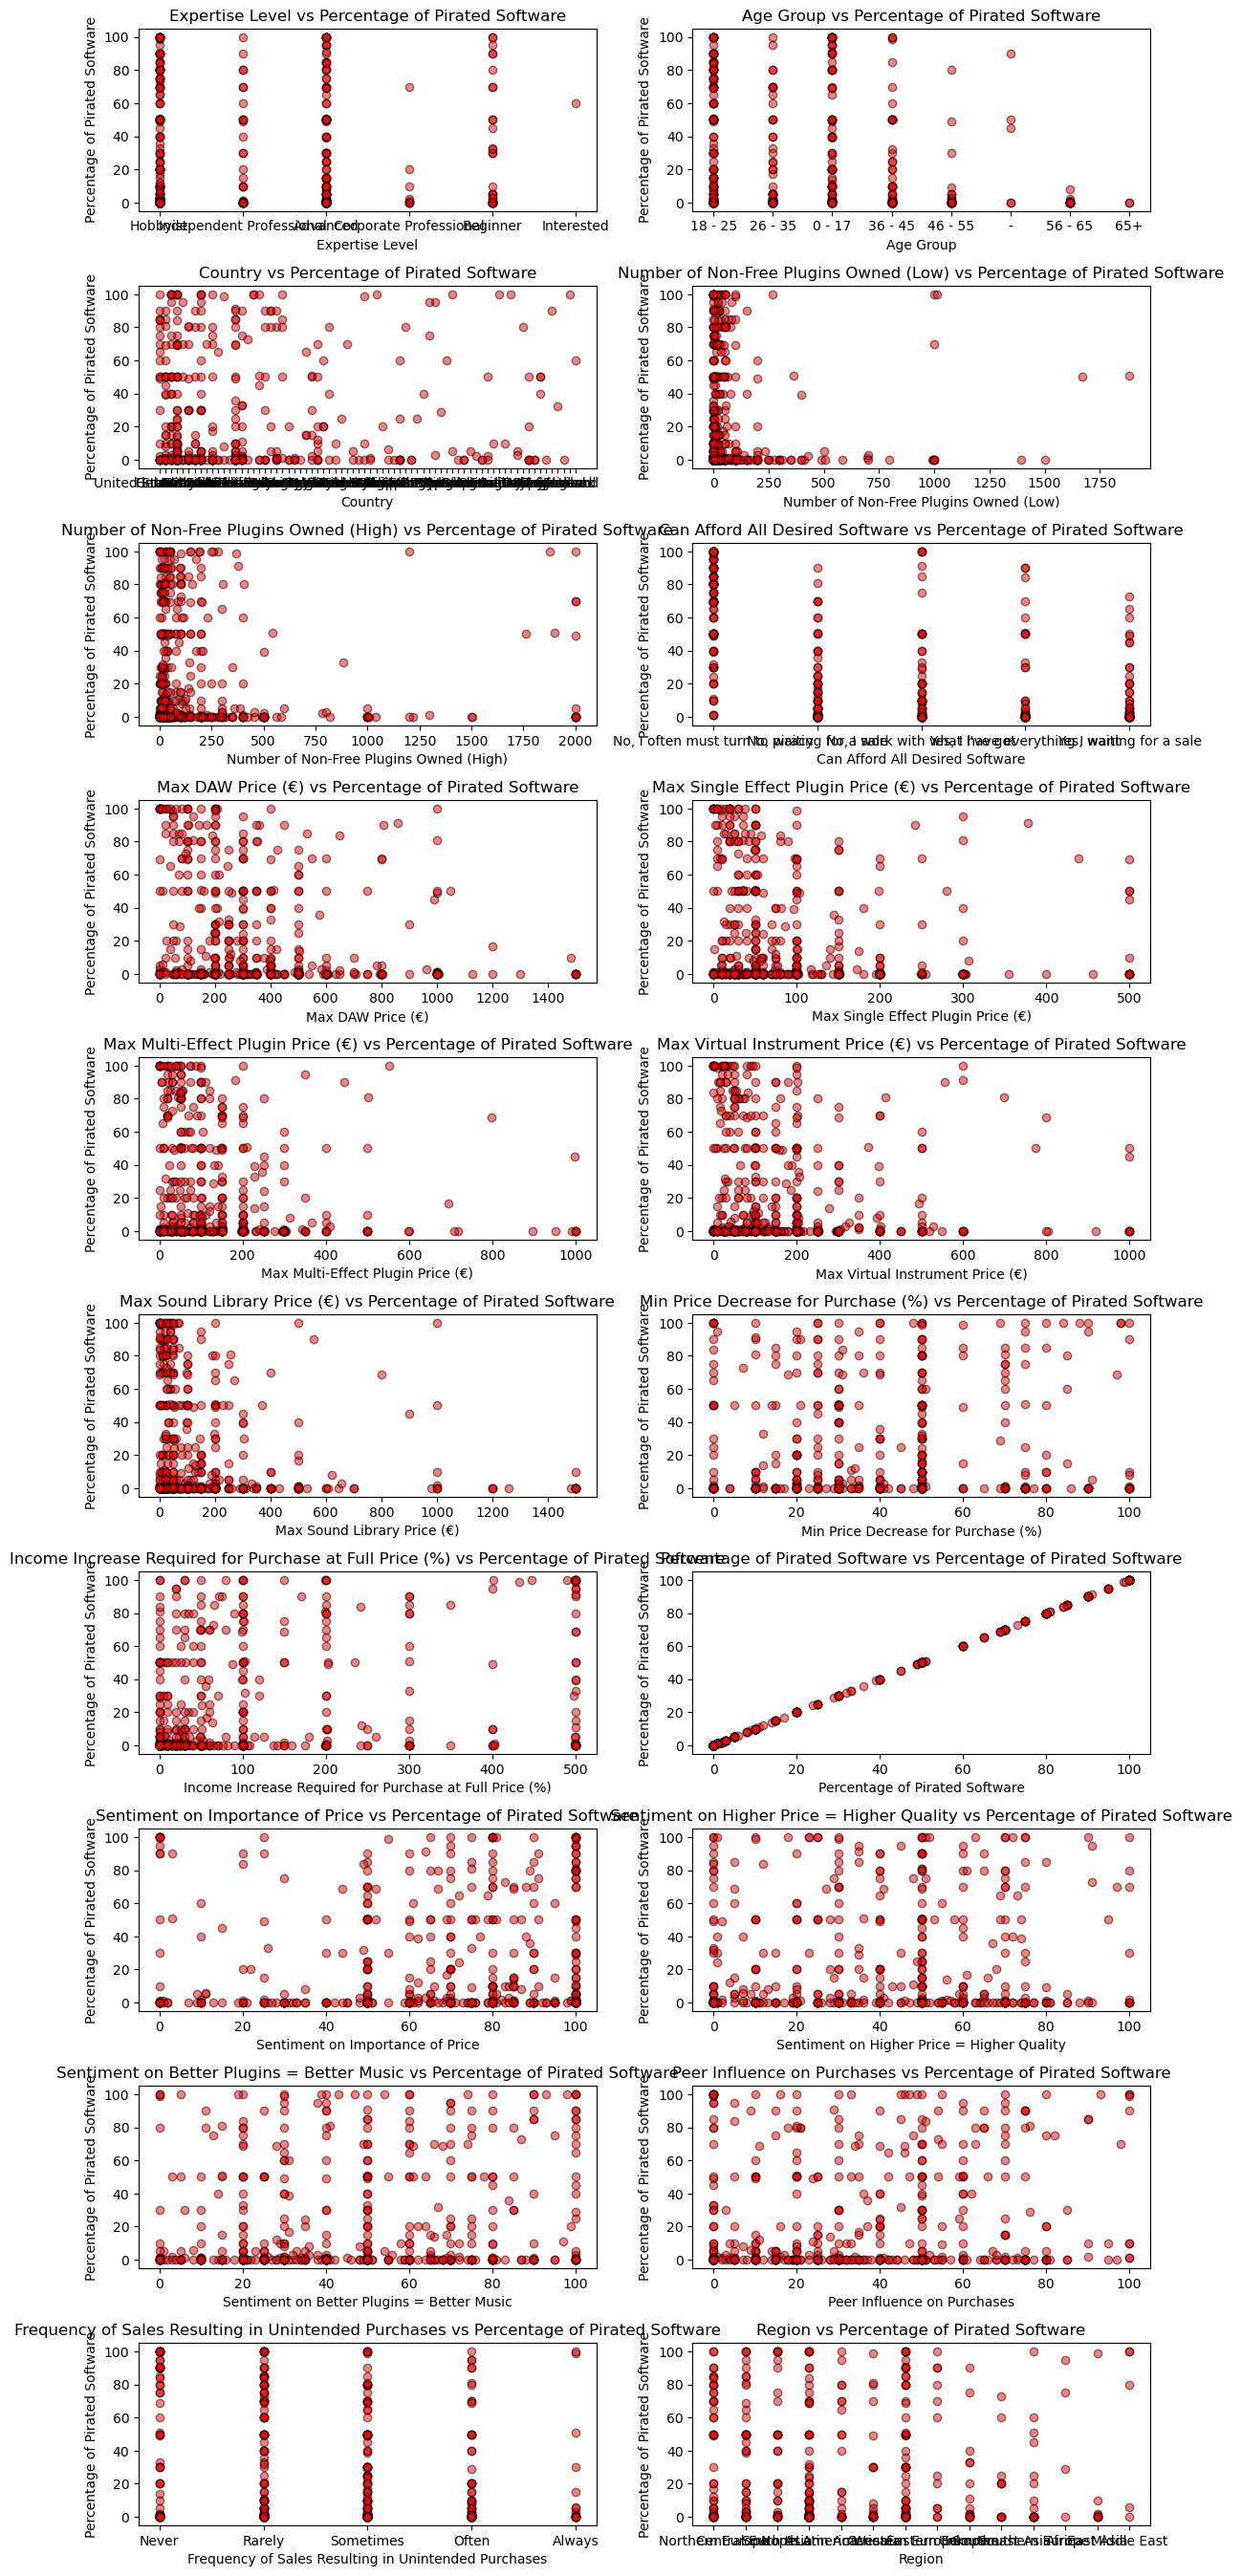

In [8]:
columns_to_plot.append('Region')

plt.figure(figsize = (12, 32))

for i, column in enumerate(columns_to_plot, start = 1):
    plt.subplot(12, 2, i)
    plt.scatter(df[column], df['Percentage of Pirated Software'], color = 'red', edgecolor = 'black', alpha = 0.5)
    plt.xlabel(column)
    plt.ylabel('Percentage of Pirated Software')
    plt.title(f'{column} vs Percentage of Pirated Software')

plt.tight_layout()
plt.show()

Proportion of pirates in the dataset

In [9]:
df[df['Percentage of Pirated Software'] > 0]['Percentage of Pirated Software'].count() / df.shape[0]

0.49909584086799275

Add binarized nominal categories encoded as numbers. The label "Pirate" is binarized such that people who answered anything other than 0% to percentage of pirated software are classified as pirates (1) and people who answered 0 are classified as non-pirates (0).

In [10]:
def map_non_zero(value):
    return 1 if value != 0 else 0

def map_afford(value):
    return 1 if value.startswith('Yes') else 0

def map_boolean(value):
    return 1 if value == True else 0

df.insert(2, 'Pirate', df['Percentage of Pirated Software'].apply(map_non_zero))
df.insert(12, 'Can Afford Everything', df['Can Afford All Desired Software'].apply(map_afford))
df.insert(12, 'Ease of Pirating is Important', df['Top 3 Purchase Decision Factors'].str.contains('Ease of pirating').apply(map_boolean))

Compare feature distributions between pirates and non-pirates.

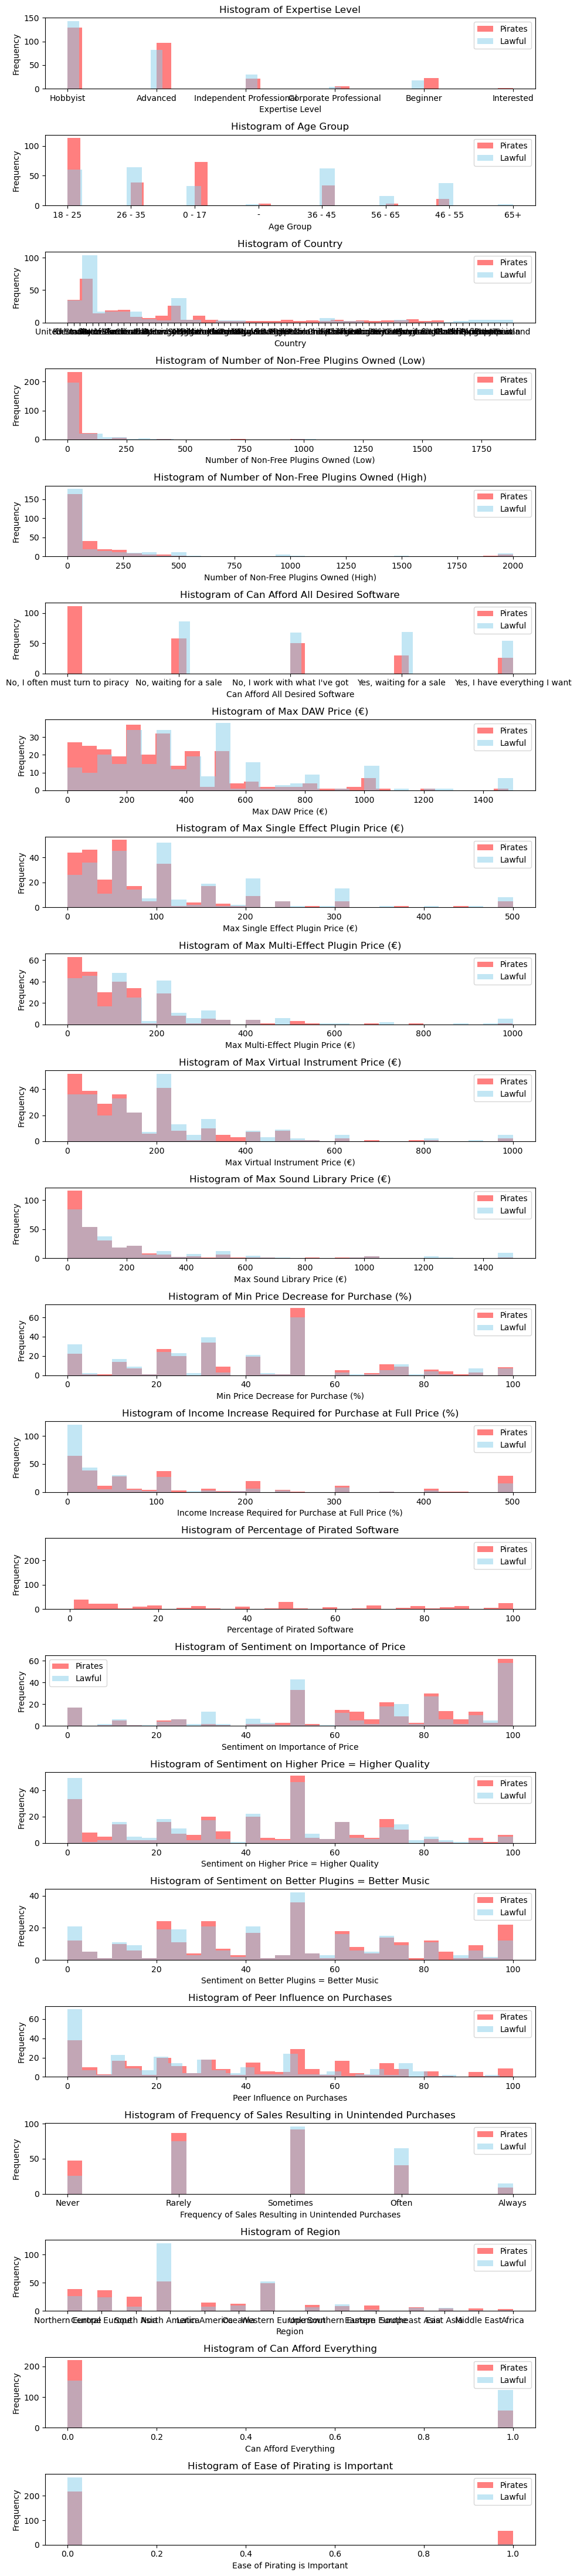

In [11]:
columns_to_plot.append('Can Afford Everything')
columns_to_plot.append('Ease of Pirating is Important')

pirates_df = df[df['Pirate'] == 1]
lawful_df = df[df['Pirate'] == 0]

# Create subplots for each column
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 44))

for i, column in enumerate(columns_to_plot):
    
    # Plot the combined histogram
    axes[i].hist(pirates_df[column].fillna(0), bins = 30, color = 'red', alpha = 0.5, label = 'Pirates')
    axes[i].hist(lawful_df[column].fillna(0), bins = 30, color = 'skyblue', alpha = 0.5, label = 'Lawful')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Features

Encode categorical data and extract features. Features were selected based on their meaningfulness to the research question of which factors drive people into software piracy. They are mostly demographic and similar data selected based on where differences were observed between pirates and non-pirates. Due to their demographic nature, they are easy to observe or estimate as opposed to, for example, the questions on ideal prices by product type and therefore they are informative for, for example, market segmentation and analysis.

Features 1-6: Expertise

In [12]:
# Feature 1: Expertise category (6 features)
f1 = pd.get_dummies(df, columns = ['Expertise Level'], prefix='', prefix_sep='', dtype = int)[['Interested', 'Beginner', 'Hobbyist', 'Advanced', 'Independent Professional', 'Corporate Professional']]
f1.head()

,Interested,Beginner,Hobbyist,Advanced,Independent Professional,Corporate Professional
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


Features 7-11: Goal

In [13]:
# Feature 2: Goal (5 features)
# Cannot be one-hot encoded because of the "other" possibility
df_encoded = df.copy()
for goal in ['To just have fun', 'To make a living', 'To start/maintain a career', 'To express oneself', 'To accomplish a specific project']:
    df_encoded[goal] = df['Goals'].str.contains(goal).astype(int)
f2 = df_encoded[['To just have fun', 'To make a living', 'To start/maintain a career', 'To express oneself', 'To accomplish a specific project']]
f2.head()

,To just have fun,To make a living,To start/maintain a career,To express oneself,To accomplish a specific project
0,0,0,0,0,0
1,1,0,1,1,0
2,0,1,0,0,0
3,1,1,1,1,0
4,1,1,1,1,0


Feature 12-19: Age Group

In [14]:
# Feature 3: Age group (8 features)
f3 = pd.get_dummies(df, columns = ['Age Group'], prefix='', prefix_sep='', dtype = int)[['0 - 17', '18 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65', '65+', '-']]
f3.head()

,0 - 17,18 - 25,26 - 35,36 - 45,46 - 55,56 - 65,65+,-
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0


Features 20-33: Region

In [15]:
# Feature 4: Region (14 features)
f4 = pd.get_dummies(df, columns = ['Region'], prefix = '', prefix_sep = '', dtype = int)
f4.drop(f4.columns[range(0, 30)], axis = 1, inplace = True)
f4.head()

,Africa,Central Europe,East Asia,Eastern Europe,Latin America,Middle East,North America,Northern Europe,Oceania,South Asia,Southeast Asia,Southern Europe,Unknown,Western Europe
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Feature 34 - Importance of Ease of Pirating

In [16]:
# Feature 5: Importance of Ease of Pirating when considering a purchase (1 feature)
f5 = df['Ease of Pirating is Important']
f5.head()

0    1
1    1
2    0
3    0
4    0
Name: Ease of Pirating is Important, dtype: int64

Feature 35 - Can afford everything

In [17]:
# Feature 6: Can afford everything (1 feature)
f6 = df['Can Afford Everything']
f6.head()

0    0
1    0
2    0
3    0
4    0
Name: Can Afford Everything, dtype: int64

Total number of features =

In [18]:
# Feature matrix
X_all = pd.concat([f1, f2, f3, f4, f5, f6], axis = 1)
X_all.shape[1]

35

Label vector:

In [19]:
y_all = df['Pirate']

## Decision Tree Classifier

The first model trained will be a Decision Tree Classifier due to its high interpretability, which is excellent for the research question of which factors correlate with piracy. Decision Tree Classifier is also great for binary classification with (one-hot encoded) binary variables and this task particularly due to its simplicity and resulting low training times.

Due to the simple model and small dataset, it is entirely reasonable and desirable in terms of the goal of the project to simply iterate through all feature combinations to see which one of them is the most predictive and therefore, which features most correlate with piracy.

List all unique feature combinations to be tested.

In [20]:
import itertools

# List of elements
features = [f1, f2, f3, f4, f5, f6]
feature_names = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']

# Get all combinations of lengths 1 to 6
all_feature_combinations = []
all_combinations = []
for r in range(1, len(features) + 1):
    feature_combinations = list(itertools.combinations(features, r))
    all_feature_combinations.extend(feature_combinations)
    
    combinations = list(itertools.combinations(feature_names, r))
    all_combinations.extend(combinations)
    
for combo in all_combinations:
    print(combo)

('f1',)
('f2',)
('f3',)
('f4',)
('f5',)
('f6',)
('f1', 'f2')
('f1', 'f3')
('f1', 'f4')
('f1', 'f5')
('f1', 'f6')
('f2', 'f3')
('f2', 'f4')
('f2', 'f5')
('f2', 'f6')
('f3', 'f4')
('f3', 'f5')
('f3', 'f6')
('f4', 'f5')
('f4', 'f6')
('f5', 'f6')
('f1', 'f2', 'f3')
('f1', 'f2', 'f4')
('f1', 'f2', 'f5')
('f1', 'f2', 'f6')
('f1', 'f3', 'f4')
('f1', 'f3', 'f5')
('f1', 'f3', 'f6')
('f1', 'f4', 'f5')
('f1', 'f4', 'f6')
('f1', 'f5', 'f6')
('f2', 'f3', 'f4')
('f2', 'f3', 'f5')
('f2', 'f3', 'f6')
('f2', 'f4', 'f5')
('f2', 'f4', 'f6')
('f2', 'f5', 'f6')
('f3', 'f4', 'f5')
('f3', 'f4', 'f6')
('f3', 'f5', 'f6')
('f4', 'f5', 'f6')
('f1', 'f2', 'f3', 'f4')
('f1', 'f2', 'f3', 'f5')
('f1', 'f2', 'f3', 'f6')
('f1', 'f2', 'f4', 'f5')
('f1', 'f2', 'f4', 'f6')
('f1', 'f2', 'f5', 'f6')
('f1', 'f3', 'f4', 'f5')
('f1', 'f3', 'f4', 'f6')
('f1', 'f3', 'f5', 'f6')
('f1', 'f4', 'f5', 'f6')
('f2', 'f3', 'f4', 'f5')
('f2', 'f3', 'f4', 'f6')
('f2', 'f3', 'f5', 'f6')
('f2', 'f4', 'f5', 'f6')
('f3', 'f4', 'f5', 'f6')
('

Use stratified K-fold cross validation to maximize diversity, representation and usage of very limited data in training

In [21]:
k = 5
skf = StratifiedKFold(n_splits = k, shuffle = True, random_state = 10)

Find the best feature combination by training the DecisionTreeClassifier for each using K-fold cross validation. This takes 567 iterations with six types of categories and a range of 9 but due to the small dataset and simple model, it does not take too long.

In [22]:
# Mean accuracies for each feature combination
mean_accs_per_combo = []

for combo in all_feature_combinations:
    
    # Feature matrix using the given feature combination
    X_all = pd.concat(combo, axis = 1)
    
    # Splitting the data for training and testing - must be in the loop to use the correct feature matrix but does not save the correct test sets
    # However, using the same random_state ensures that X_test and y_test stay unused in this cell and are therefore novel in the testing phase
    X, X_test, y, y_test = train_test_split(X_all, y_all, test_size = 0.20, random_state = 100, shuffle = True)
    
    # Mean accuracies produced by K-fold cross validation for a single feature combination
    mean_accuracies = []
    
    # Train and validate DecisionTreeClassifier with different max_depth hyperparameter values for optimization
    for i in range(1, 10):

        dtc = DecisionTreeClassifier(max_depth = i, random_state = 100)

        accuracy_scores = []

        # Train and validate a single DecisionTreeClassifier using K-fold cross validation
        for train_index, val_index in skf.split(X, y):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            dtc.fit(X_train, y_train)

            y_pred = dtc.predict(X_val)

            accuracy = accuracy_score(y_val, y_pred)
            accuracy_scores.append(accuracy)

        # Mean accuracy across all folds
        mean_accuracy = sum(accuracy_scores) / k
        mean_accuracies.append(mean_accuracy)
        
    mean_accs_per_combo.append(mean_accuracies)

### Most significant features

Best feature combination

In [23]:
index_of_best_combination = max(range(len(mean_accs_per_combo)), key=lambda i: max(mean_accs_per_combo[i]))
best_feature_combination = all_combinations[index_of_best_combination]
best_features = all_feature_combinations[index_of_best_combination]
best_feature_combination

('f1', 'f3', 'f4', 'f5')

```('f1', 'f3', 'f4, 'f5')``` corresponds to Expertise, Age Group, Region and Importance of Ease of Pirating

Validation error

Calculate and visualize optimal maximum depth

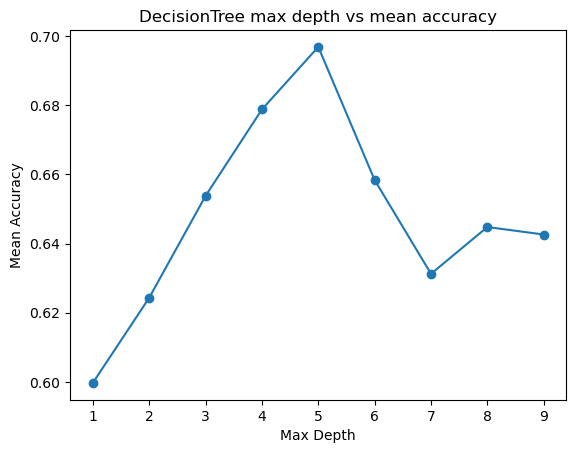

Optimal maximum depth: 5


In [24]:
bfc_accuracies = mean_accs_per_combo[index_of_best_combination]

plt.plot(list(range(1, 10)), bfc_accuracies, marker = 'o', linestyle = '-')
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.title('DecisionTree max depth vs mean accuracy')
plt.show()

optimal_max_depth = bfc_accuracies.index(max(bfc_accuracies)) + 1
print(f'Optimal maximum depth: {optimal_max_depth}')

Create and split the optimal feature matrix

In [25]:
# Optimal feature matrix
X_optimal = pd.concat(best_features, axis = 1)

# Splitting the data for training and testing - as it uses the same random_state as the splitter in the training cell a few cells above,
# the test sets remain novel and the final model can be trained with all non-test data due to K-fold cross validation
X, X_test, y, y_test = train_test_split(X_optimal, y_all, test_size = 0.20, random_state = 100, shuffle = True)

Optimized DecisionTreeClassifier

In [26]:
optimal_dtc = DecisionTreeClassifier(max_depth = optimal_max_depth, random_state = 100)
optimal_dtc.fit(X, y)

DecisionTreeClassifier(max_depth=5, random_state=100)

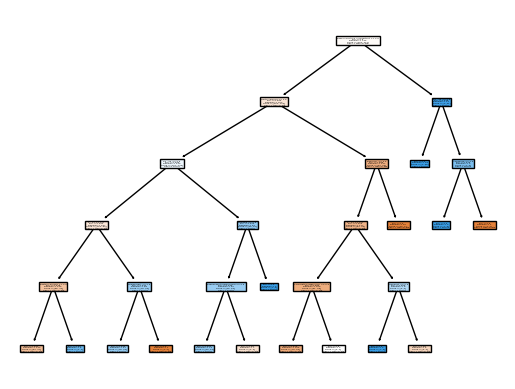

True

In [27]:
plot_tree(optimal_dtc, feature_names = list(X_optimal.columns),  filled = True, class_names = ["Non-Pirate", "Pirate"])
plt.show()

# save as pdf for a high res image:
import pydotplus
d_tree = export_graphviz(optimal_dtc, feature_names = list(X_optimal.columns), filled = True, class_names = ["Non-Pirate", "Pirate"])
pydot_graph = pydotplus.graph_from_dot_data(d_tree)
pydot_graph.write_pdf('pirates_tree.pdf')

## Decision Tree Classifier Evaluation

In [28]:
y_final_pred = optimal_dtc.predict(X_test)

Accuracy score:

In [29]:
dtc_accuracy = accuracy_score(y_test, y_final_pred)
print("DecisionTreeClassifier Accuracy:", dtc_accuracy)

DecisionTreeClassifier Accuracy: 0.7387387387387387


Confusion matrix:

In [30]:
conf_mat = confusion_matrix(y_test, y_final_pred)

[Text(0, 0.5, 'Pirate'), Text(0, 1.5, 'Non-Pirate')]

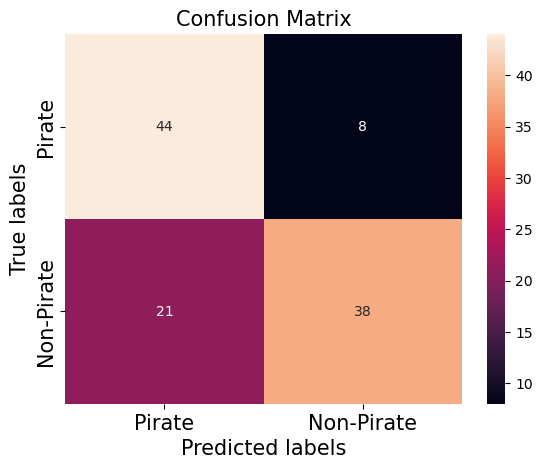

In [31]:
# Visualize the confusion matrix you computed
ax = plt.subplot()

sns.heatmap(conf_mat, annot = True, fmt = 'g', ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 15)
ax.set_ylabel('True labels',fontsize = 15)
ax.set_title('Confusion Matrix',fontsize = 15)
ax.xaxis.set_ticklabels(['Pirate', 'Non-Pirate'], fontsize = 15)
ax.yaxis.set_ticklabels(['Pirate', 'Non-Pirate'], fontsize = 15)

Precision:

In [32]:
dtc_precision_pirate = precision_score(y_test, y_final_pred, pos_label = 0)
dtc_precision_lawful = precision_score(y_test, y_final_pred, pos_label = 1)
print("DecisionTreeClassifier Precision for Pirate:", dtc_precision_pirate)
print("DecisionTreeClassifier Precision for Pirate:", dtc_precision_lawful)

DecisionTreeClassifier Precision for Pirate: 0.676923076923077
DecisionTreeClassifier Precision for Pirate: 0.8260869565217391


Recall:

In [33]:
dtc_recall_pirate = recall_score(y_test, y_final_pred, pos_label=0)
dtc_recall_lawful = recall_score(y_test, y_final_pred, pos_label=1)
print("DecisionTreeClassifier Recall for Pirate:", dtc_recall_pirate)
print("DecisionTreeClassifier Recall for Lawful:", dtc_recall_lawful)

DecisionTreeClassifier Recall for Pirate: 0.8461538461538461
DecisionTreeClassifier Recall for Lawful: 0.6440677966101694


F1 Score:

In [34]:
dtc_f1_pirate = f1_score(y_test, y_final_pred, pos_label=0)
dtc_f1_lawful = f1_score(y_test, y_final_pred, pos_label=1)
print("DecisionTreeClassifier F1 Score for Pirate:", dtc_f1_pirate)
print("DecisionTreeClassifier F1 Score for Lawful:", dtc_f1_lawful)

DecisionTreeClassifier F1 Score for Pirate: 0.7521367521367521
DecisionTreeClassifier F1 Score for Lawful: 0.7238095238095238


# Logistic Regression

The second model to be trained is Logistic Regression as it can also perform feature selection with L1 penalty and it is quite simple and fast as well and thus works as a great benchmark for many binary classification tasks. It also outputs probabilities, which is useful for the actual classification task as it quantifies the uncertainty associated with each prediction.

Ensure that the Logistic Regression starts from the same point as the decision tree by re-initializing the training and testing data.

In [35]:
# Feature matrix
X_all = pd.concat([f1, f2, f3, f4, f5, f6], axis = 1)
# Label vector
y_all = df['Pirate']

Split the data similarly to the decision tree. 

In [36]:
X, X_test, y, y_test = train_test_split(X_all, y_all, test_size = 0.20, random_state = 100, shuffle = True)

In [37]:
# Mean accuracies produced by K-fold cross validation for a single feature combination
mean_accuracies = []

# Train and validate LogisticRegression with different max_depth hyperparameter values for optimization
for i in np.arange(0.01, 2, 0.01):

    lr = LogisticRegression(penalty = 'l1', C = i, solver = 'liblinear', max_iter = 1000, random_state = 100)

    accuracy_scores = []

    # Train and validate a single LogisticRegression model using K-fold cross validation
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_val)

        accuracy = accuracy_score(y_val, y_pred)
        accuracy_scores.append(accuracy)

    # Mean accuracy across all folds
    mean_accuracy = sum(accuracy_scores) / k
    mean_accuracies.append(mean_accuracy)

Calculate and visualize optimal C value

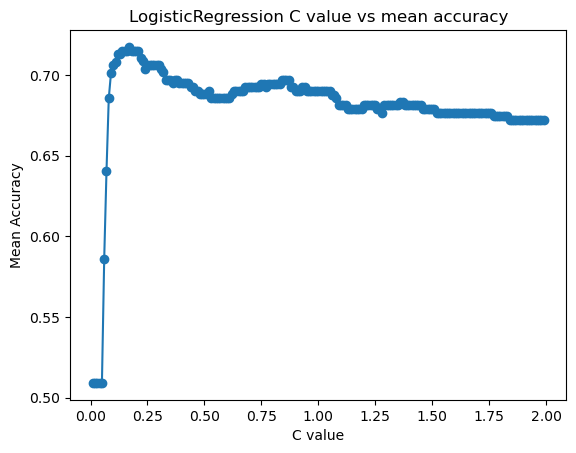

Optimal C value: 0.18000000000000002


In [38]:
plt.plot(list(np.arange(0.01, 2, 0.01)), mean_accuracies, marker = 'o', linestyle = '-')
plt.xlabel('C value')
plt.ylabel('Mean Accuracy')
plt.title('LogisticRegression C value vs mean accuracy')
plt.show()

optimal_C_value = np.arange(0.01, 2, 0.01)[mean_accuracies.index(max(mean_accuracies)) + 1]
print(f'Optimal C value: {optimal_C_value}')

Optimized Logistic Regression Classifier

In [39]:
optimal_lr = LogisticRegression(penalty = 'l1', C = optimal_C_value, solver = 'liblinear', max_iter = 1000, random_state = 100)
optimal_lr.fit(X, y)

LogisticRegression(C=0.18000000000000002, max_iter=1000, penalty='l1',
                   random_state=100, solver='liblinear')

### Most significant features

LogisticRegression coefficients:

In [40]:
lr_coefficients = optimal_lr.coef_
lr_coefficients

array([[ 0.        ,  0.        , -0.05119032,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54950775,  0.64150589,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.77741394,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.18415729,  1.56285894, -0.48302527]])

In [41]:
def get_significant_features(coef, feature_names):
    # Create a list to store (feature_name, sign) tuples
    feature_significances = []

    # Iterate through the coefficients and feature names
    for feature_coef, feature_name in zip(coef[0], feature_names):
        
        feature_significances.append((feature_name, feature_coef))

    return sorted([(item, value) for item, value in feature_significances if value != 0], key = lambda x: x[1])

In [42]:
signs = get_significant_features(lr_coefficients, X_all.columns)
signs

[('North America', -0.7774139414801525),
 ('Can Afford Everything', -0.4830252662276539),
 ('Western Europe', -0.18415729455530533),
 ('Hobbyist', -0.05119032120880527),
 ('0 - 17', 0.5495077530513445),
 ('18 - 25', 0.6415058922810647),
 ('Ease of Pirating is Important', 1.5628589424119608)]

## Logistic Regression Classifier Evaluation

In [43]:
y_final_pred_lr = optimal_lr.predict(X_test)

Accuracy score:

In [44]:
lr_accuracy = accuracy_score(y_test, y_final_pred_lr)
print("DecisionTreeClassifier Accuracy:", lr_accuracy)

DecisionTreeClassifier Accuracy: 0.7297297297297297


Confusion matrix:

In [45]:
conf_mat_lr = confusion_matrix(y_test, y_final_pred_lr)

[Text(0, 0.5, 'Pirate'), Text(0, 1.5, 'Non-Pirate')]

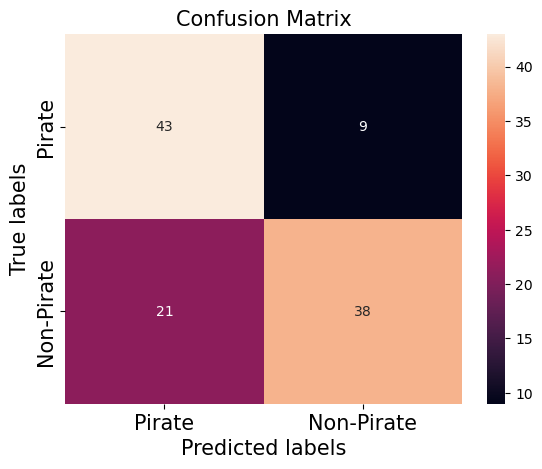

In [46]:
# Visualize the confusion matrix you computed
ax = plt.subplot()

sns.heatmap(conf_mat_lr, annot = True, fmt = 'g', ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 15)
ax.set_ylabel('True labels',fontsize = 15)
ax.set_title('Confusion Matrix',fontsize = 15)
ax.xaxis.set_ticklabels(['Pirate', 'Non-Pirate'], fontsize = 15)
ax.yaxis.set_ticklabels(['Pirate', 'Non-Pirate'], fontsize = 15)

Precision:

In [47]:
lr_precision_pirate = precision_score(y_test, y_final_pred_lr, pos_label = 0)
lr_precision_lawful = precision_score(y_test, y_final_pred_lr, pos_label = 1)
print("DecisionTreeClassifier Precision for Pirate:", lr_precision_pirate)
print("DecisionTreeClassifier Precision for Pirate:", lr_precision_lawful)

DecisionTreeClassifier Precision for Pirate: 0.671875
DecisionTreeClassifier Precision for Pirate: 0.8085106382978723


Recall:

In [48]:
lr_recall_pirate = recall_score(y_test, y_final_pred_lr, pos_label=0)
lr_recall_lawful = recall_score(y_test, y_final_pred_lr, pos_label=1)
print("DecisionTreeClassifier Recall for Pirate:", lr_recall_pirate)
print("DecisionTreeClassifier Recall for Lawful:", lr_recall_lawful)

DecisionTreeClassifier Recall for Pirate: 0.8269230769230769
DecisionTreeClassifier Recall for Lawful: 0.6440677966101694


F1 Score:

In [49]:
lr_f1_pirate = f1_score(y_test, y_final_pred_lr, pos_label=0)
lr_f1_lawful = f1_score(y_test, y_final_pred_lr, pos_label=1)
print("DecisionTreeClassifier F1 Score for Pirate:", lr_f1_pirate)
print("DecisionTreeClassifier F1 Score for Lawful:", lr_f1_lawful)

DecisionTreeClassifier F1 Score for Pirate: 0.7413793103448276
DecisionTreeClassifier F1 Score for Lawful: 0.7169811320754716


# Conclusion

Extreme care when evaluating the results is adviced due to the small sample size and high bias of the dataset towards the western world. For example, it is not fair to conclude that people from certain regions are software pirates because of their extremely limited representation. However, a clear trend can be observed in the weights of the logistic regression model, where wealthy regions correlate negatively with piracy.

Trends can also be observed especially in importance of ease of pirating and age groups. This observation of age groups and regions being major features implies that there might still be more room for further market segmentation in the form of, for example, country-specific pricing and student discounts. There are also two ways of decreasing ease of pirating; make piracy harder or make buying relatively easier.

These models should only be used for inspecting the predictive power of the given features, not for labeling people because of their suboptimal classification performance but even more importantly because we do not want to increase online surveillance any more than we already have and that would most likely only be treating the symptom, not the cause anyway. Let's focus our efforts on making piracy redundant by trying to providing equitable access for everyone rather than try fight a losing battle with more and more inconvenient and annoying user experiences for the paying customers. 